# CSC 580 Artificial Intelligence II, Winter 2025

# Name : Omprakash Student ID: 2131025

# HW\#2 Cliffwalk


### 1. Install gymnasium and create a Cliff Walk environment


In [ ]:
%pip install "gymnasium[toy-text]"
%pip install "matplotlib"

In [4]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")
env.reset()

env.render( )  # Get the current frame as an RGB array


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]

In [5]:

#print (env.render())  # textual output if mode == 'ansi' or 'human'
env.render() # gui/rgb output

array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]

### 2. Inspect environment, transition probabilities and rewards


In [6]:
nS = env.observation_space.n    # number of states -- 48
nA = env.action_space.n         # number of actions -- four directions; 0:left, 1:down, 2:right, 3:up
print ("{}, {}".format(nS, nA))

48, 4


Transition probabilities, rewards and other info are stored a dictionary **env.P**. You use state index (0-based) to access the info. The tuple for each transition indicates (transition_probability, new_state, reward, terminated).

**IMPORTANT**: If you get an error "AttributeError: 'OrderEnforcing' object has no attribute 'P'", add a line to unwrap the environment and access P inside. For example,

<pre># Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]</pre>


In [7]:

# Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]

{0: [(0.3333333333333333, np.int64(0), -1, False),
  (0.3333333333333333, np.int64(0), -1, False),
  (0.3333333333333333, np.int64(1), -1, False)],
 1: [(0.3333333333333333, np.int64(0), -1, False),
  (0.3333333333333333, np.int64(1), -1, False),
  (0.3333333333333333, np.int64(12), -1, False)],
 2: [(0.3333333333333333, np.int64(1), -1, False),
  (0.3333333333333333, np.int64(12), -1, False),
  (0.3333333333333333, np.int64(0), -1, False)],
 3: [(0.3333333333333333, np.int64(12), -1, False),
  (0.3333333333333333, np.int64(0), -1, False),
  (0.3333333333333333, np.int64(0), -1, False)]}

## 3. Create a random/fixed policy and run the policy once.


In [8]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    A policy is a 1D array of length # of states, where each element is a
    random action. The action is chosen uniformly at random from the
    If a specific seed is passed, the same numbers are genereated, while
    if the seed is None, the numbers are unpredictable every time.
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)

In [9]:
def run(env, pi, printinfo = False):
    """
    Run the policy on the environment and returns the cumulative reward.
    :param: env: The environment
    :param: pi: A given policy, represented as a 1D array of length # of states.
    :return: Cumulative reward
    """
    s = env.reset()
    if printinfo == True:
      print (f'\n* Episode starting from state {s[0]}') # ensure starting from state 36

    s = s[0]      # extract the state value/index from the tuple
    done = False  # this becomes true when agent reaches the goal state (47)
    sum_r = 0
    step_count = 0
    near_fall = 0
    
    beside_cliff = 0
    cells_around_cliff = [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,36,47]
    
    while not done:
        could_be_nearfall = False
        # print('while loop start')
        a = pi[s]   # action for the state s, according to the policy
        if s in cells_around_cliff:
            # Check if the chosen action would normally lead to cliff
            # For cells above cliff (24-35), check if action is "down" (1)
            # For cell 36, check if action is "right" (2)
            # For cell 47, check if action is "left" (0)
            beside_cliff += 1
            if (s in range(24, 36) and a == 1) or (s == 36 and a == 2) or (s == 47 and a == 0):
                could_be_nearfall = True
            
        
        step_count += 1
        s, r, done, info, p = env.step(a)  # take the action
        
        sum_r += r  # accumulate reward

        #Here my thought process was 
        #if the agent is near the cliff and the reward is not -100, then it is a near fall and missed the fall
        #I am not sure if this is the correct way to check for near fall
        if could_be_nearfall and r != -100:
            near_fall += 1
            
        ### uncomment below to see the information for each step
        #print (f'next_state={s}, reward={r}, done={done}, info={info}, p={p}')

        # prints info in text if render_mode is 'ansi' or no output if 'human',
        # or graphical output if 'rgb_array' AND if the code is run from command line.
        #env.render()
    return sum_r,step_count,beside_cliff/step_count, near_fall/step_count

### Run the given policy just once and observe what's returned (the total return).


In [10]:
policy = generate_random_policy(nA, nS, 17) # third parameter is the random seed
print ("*** Policy ***\n{}".format(policy.reshape((4, 12))))

# Do just one run
result = run(env, policy)
# Print the total rewards/return
print (f' ==> Total return: {result}')

*** Policy ***
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]
 ==> Total return: (-50824, 8353, 0.4327786424039267, 0.0)


In [11]:
# return sum_r,step_count,beside_cliff/step_count, near_fall/step_count
from tqdm import tqdm
def procedure(policy, num_episodes):
    """
    Run the policy for a number of episodes and return the average cumulative reward.
    :param: policy: A given policy, represented as a 1D array of length # of states.
    """
    print ("Running the policy for {} episodes...".format(num_episodes))
    total_reward = []
    total_steps = []
    total_near_fall= []
    total_beside_cliff = []
    for i in tqdm(range(num_episodes), position=0, leave=True):
        r, steps,beside_cliff, near_fall_count = run(env, policy)
        total_beside_cliff.append(beside_cliff)
        total_reward.append(r)
        total_steps.append(steps)
        total_near_fall.append(near_fall_count)
    return total_reward, total_steps, total_near_fall, total_beside_cliff

In [12]:
import matplotlib.pyplot as plt
def output(total_reward, total_steps, total_near_fall, total_beside_cliff,seed):
    """
    Output the average cumulative reward and the standard deviation.
    """
    print(f' ==> Output for seed: {seed}')
    print (f' ==> Average reward: {np.mean(total_reward)}')
    print (f' ==> Average steps: {np.mean(total_steps)}')
    print (f' ==> Average near fall: {np.mean(total_near_fall)}')
    print (f' ==> Average beside cliff: {np.mean(total_beside_cliff)}')
    
    print (f' ==> Standard deviation of reward: {np.std(total_reward)}')
    print (f' ==> Standard deviation of steps: {np.std(total_steps)}')
    print (f' ==> Standard deviation of near fall: {np.std(total_near_fall)}')
    print (f' ==> Standard deviation of beside cliff: {np.std(total_beside_cliff)}')

    
    
    fig, axs = plt.subplots(1, 4, figsize=(12, 6)) 

    # Steps
    axs[0].hist(total_steps, bins=20, color='orange', edgecolor='black')
    axs[0].set_title("Steps for seed: {}".format(seed))
    axs[0].set_yscale('linear')  # Set y-scale to linear
    
    # Ratio of Beside cliff
    axs[1].hist(total_beside_cliff, bins=20, color='brown', edgecolor='black')
    axs[1].set_title("Ratio of Around cliff for seed: {}".format(seed))
    
    # Rewards
    axs[2].hist(total_reward, bins=20, color='green', edgecolor='black')
    axs[2].set_title("Rewards for seed: {}".format(seed))
    
    # Ratio of Near-falls
    axs[3].hist(total_near_fall, bins=20, color='cyan', edgecolor='black')
    axs[3].set_title("Ratio of Near-falls for seed: {}".format(seed))

    
    plt.tight_layout()  # Adjust layout
    plt.show()
    
    

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:01<00:00, 72.94it/s]


 ==> Output for seed: 17
 ==> Average reward: -20748.47
 ==> Average steps: 3127.46
 ==> Average near fall: 5.905898453590458e-05
 ==> Average beside cliff: 0.4136403416570851
 ==> Standard deviation of reward: 20842.677662169513
 ==> Standard deviation of steps: 3045.672285128523
 ==> Standard deviation of near fall: 0.00020718032186367992
 ==> Standard deviation of beside cliff: 0.049851714076945775


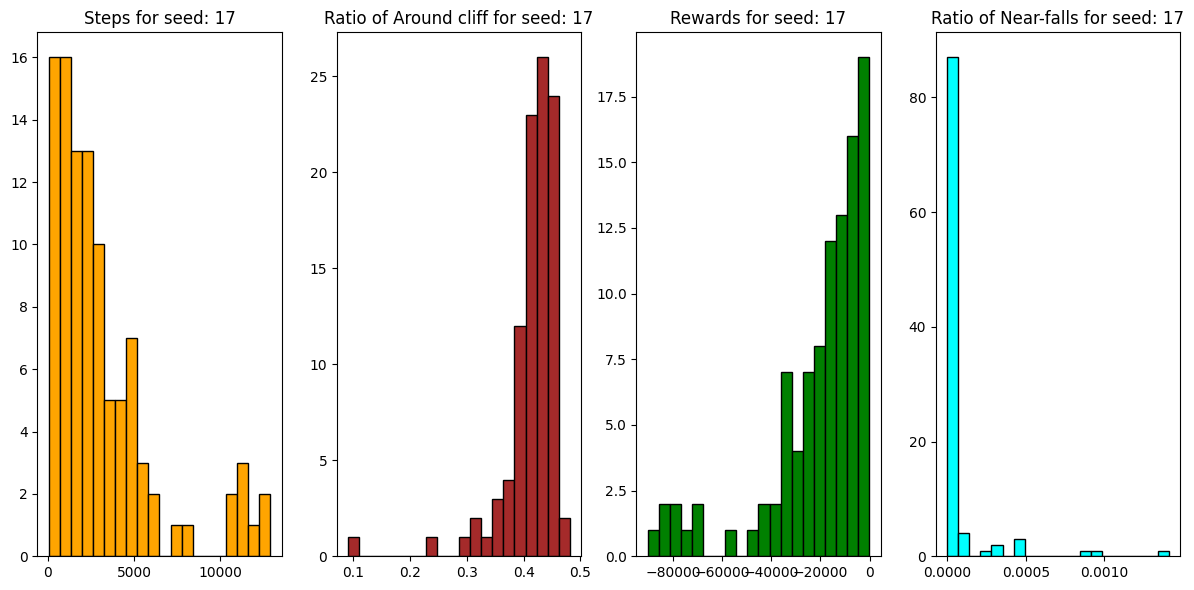

In [13]:
# Do 100 runs and print the average return
n = 100
    
policy1 = generate_random_policy(nA, nS, 17) # third parameter is the random seed


for policy in [policy1]:
    total_reward, total_steps, total_near_fall,total_beside_cliff = procedure(policy, n)
    output(total_reward, total_steps, total_near_fall,total_beside_cliff,seed=17)

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:01<00:00, 83.74it/s]


 ==> Output for seed: 19
 ==> Average reward: -25970.7
 ==> Average steps: 2706.69
 ==> Average near fall: 0.14637418438253977
 ==> Average beside cliff: 0.4630669640132981
 ==> Standard deviation of reward: 27633.31632558785
 ==> Standard deviation of steps: 2809.723810964344
 ==> Standard deviation of near fall: 0.019815597099205644
 ==> Standard deviation of beside cliff: 0.05910016673836438


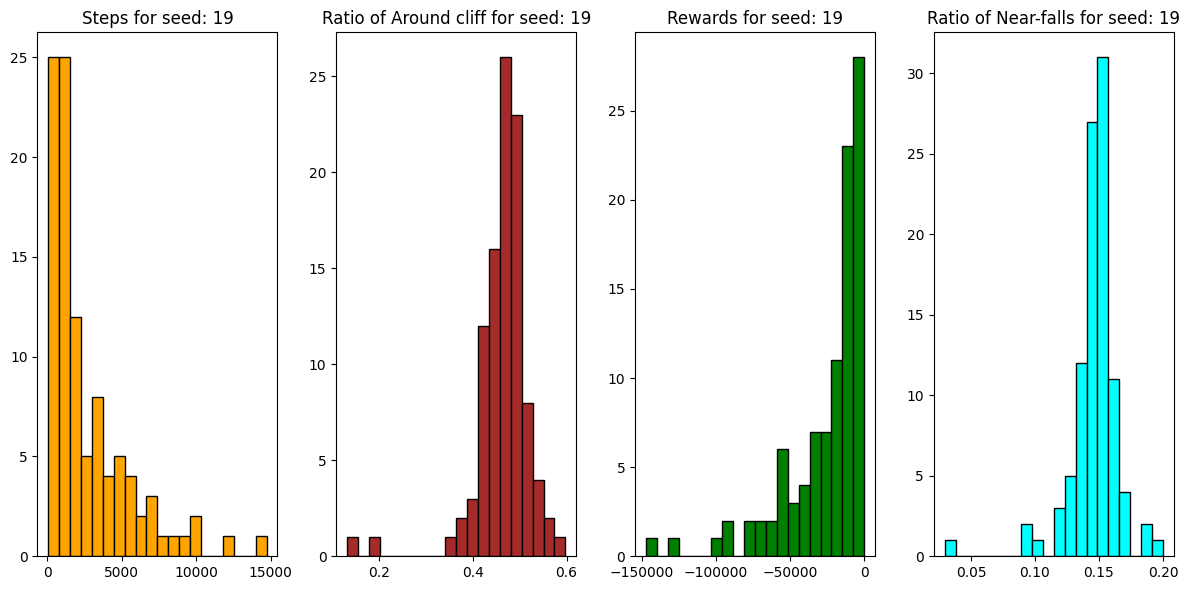

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 349.19it/s]


 ==> Output for seed: 21
 ==> Average reward: -3166.11
 ==> Average steps: 639.63
 ==> Average near fall: 0.0658426764757201
 ==> Average beside cliff: 0.21353544885531203
 ==> Standard deviation of reward: 3125.727307027918
 ==> Standard deviation of steps: 581.7097498753137
 ==> Standard deviation of near fall: 0.020841470627897433
 ==> Standard deviation of beside cliff: 0.057665078024030626


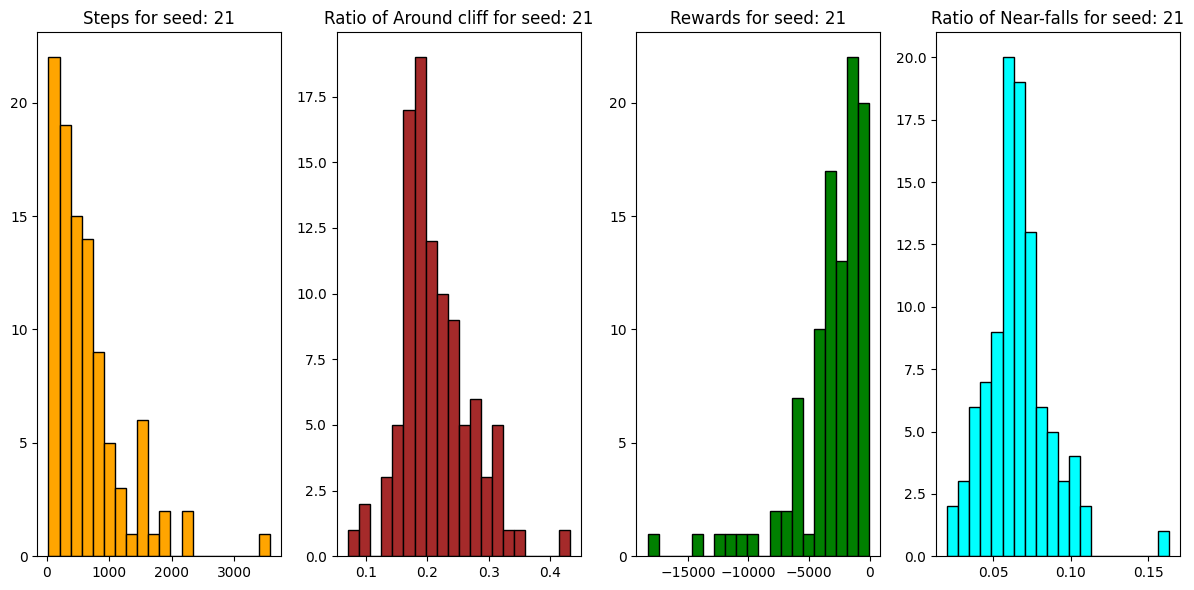

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:01<00:00, 50.42it/s]


 ==> Output for seed: 23
 ==> Average reward: -43920.51
 ==> Average steps: 4552.17
 ==> Average near fall: 0.12307805207407395
 ==> Average beside cliff: 0.37861339218735807
 ==> Standard deviation of reward: 38895.25873020901
 ==> Standard deviation of steps: 4004.7783710337826
 ==> Standard deviation of near fall: 0.022057890512962967
 ==> Standard deviation of beside cliff: 0.06594869929257952


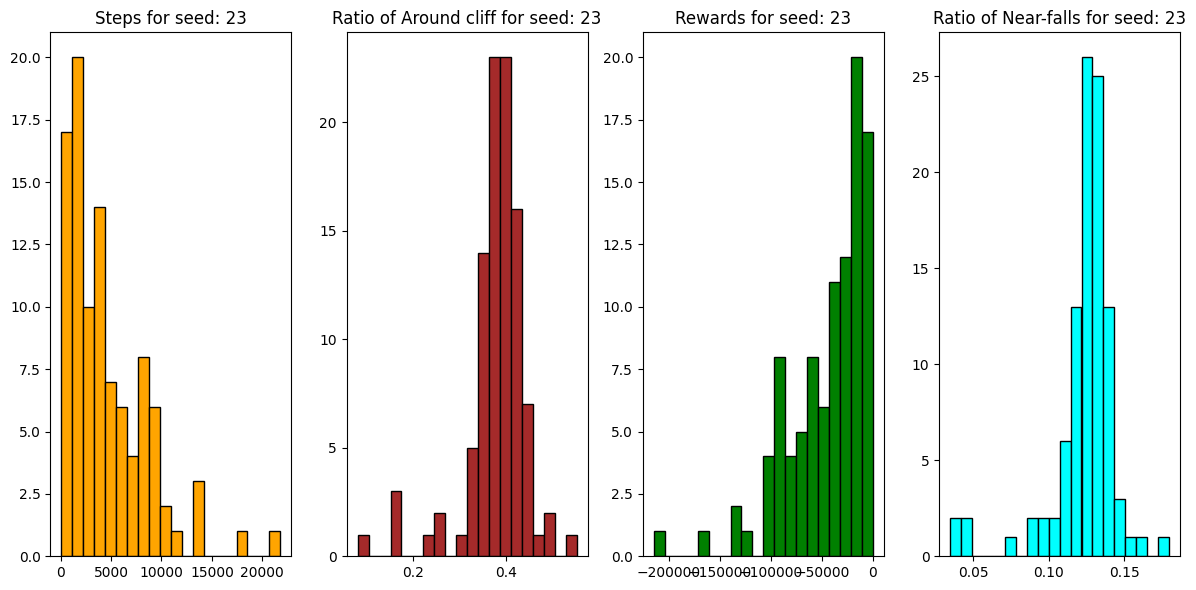

In [14]:
policy2 = generate_random_policy(nA, nS, 12) # third parameter is the random seed
policy3 = generate_random_policy(nA, nS, 23) # third parameter is the random seed
policy4 = generate_random_policy(nA, nS, 25) # third parameter is the random seed
policies = [policy2, policy3, policy4]
seeds = [19, 21, 23]
for policy,seed in zip(policies,seeds):
    total_reward, total_steps, total_near_fall,total_beside_cliff = procedure(policy, n)
    output(total_reward, total_steps, total_near_fall,total_beside_cliff,seed)

### Policy Iteration


In [15]:
import numpy as np
def getInitalPolicy(seed):
    V = np.array([0.1 if i != 47 else 0 for i in range(48)])
    theta = 1e-6 # Threshold for convergence
    gamma = 0.8 # Discount factor
    print("Initial Value Function V(s):")
    print(V.reshape(4, 12)) 
    policy = generate_random_policy(nA, nS, seed) # third parameter is the random seed
    print('Initial Policy:')
    print(policy.reshape(4, 12))
    
    return V,policy,seed

In [16]:
def policy_evaluation(env, V, policy, gamma, theta):
    while True:
        delta = 0
    # Loop for each state
        for s in range(nS):
            v = V[s]
            V[s] = sum(
                prob * (reward + (0 if done else gamma * V[next_state]))
                for prob, next_state, reward, done in env.P[s][policy[s]]
            )
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V

In [17]:
def policy_improvement(env, V, policy, gamma):
    # Step 3: Policy Improvement
    policy_stable = True
    for s in range(len(policy)):
        old_action = policy[s]
        
        action_values = []
        for a in range(nA):
            action_value = sum(
                prob * (reward + (0 if done else gamma * V[next_state]))
                for prob, next_state, reward, done in env.P[s][a]
            )
            action_values.append(action_value)
        
        policy[s] = max(range(len(action_values)), key=lambda a: action_values[a])
        if old_action != policy[s]:
            policy_stable = False
            # print(f"State {s:2d} | {old_action} → {policy[s]} | Q: {[f'{q:.3f}' for q in action_values]}")
    return policy, policy_stable
            


Initial Value Function V(s):
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0. ]]
Initial Policy:
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]
Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2352.94it/s]

 ==> Seed: 17, is converged in 17 iterations
Optimal Value Function V(s): 
 [[ -4.9986267   -4.99759669  -4.99553287  -4.99168868  -4.98457607
   -4.97152048  -4.94786452  -4.90594181  -4.83449661  -4.72121416
   -4.56594567  -4.4181314 ]
 [ -4.99872172  -4.99785799  -4.99602668  -4.99256779  -4.9860637
   -4.9738168   -4.9506856   -4.90684335  -4.8236515   -4.66739328
   -4.38821919  -3.98172995]
 [ -4.99893303  -4.99834411  -4.99699937  -4.99437684  -4.98934599
   -4.97960692  -4.96036314  -4.92106927  -4.83680325  -4.64329143
   -4.15814634  -2.81153816]
 [ -4.99939032 -37.99923326 -70.99887467 -70.99817533 -70.99683377
  -70.99423668 -70.98910501 -70.97862664 -70.9561557  -70.90455255
  -36.44200978  -1.74974351]] 

Optimal Policy: 
 [[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]] 

 ==> Output for seed: 17
 ==> Average reward: -65.41
 ==> Average steps: 65.41
 ==> Average near fall: 0.048114485120904577
 ==> Average besi

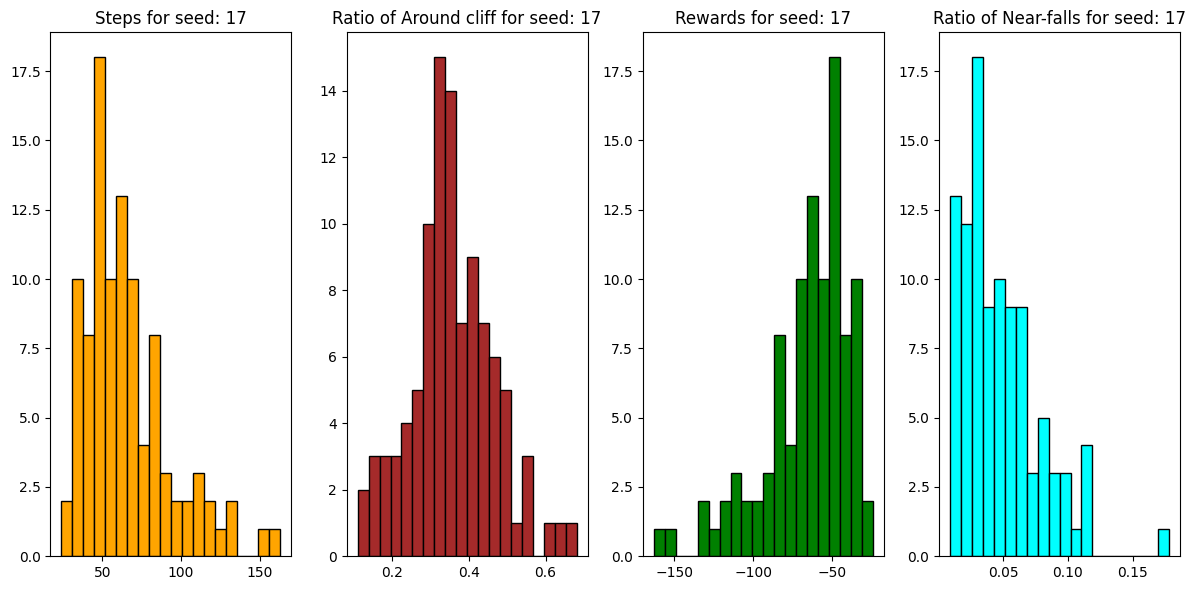

Initial Value Function V(s):
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0. ]]
Initial Policy:
[[2 1 1 3 1 1 3 0 1 1 0 2]
 [3 3 1 2 3 1 1 3 0 3 2 1]
 [3 1 1 2 3 2 2 2 3 1 2 1]
 [2 2 1 3 0 0 2 0 2 3 0 1]]
Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2823.69it/s]

 ==> Seed: 19, is converged in 4 iterations
Optimal Value Function V(s): 
 [[ -4.99862897  -4.99759853  -4.99553461  -4.99169024  -4.98457739
   -4.97152156  -4.94786536  -4.90594245  -4.8344971   -4.72121454
   -4.56594597  -4.41813166]
 [ -4.99872343  -4.99785935  -4.99602792  -4.99256889  -4.98606462
   -4.97381755  -4.95068619  -4.9068438   -4.82365184  -4.66739352
   -4.38821936  -3.98173006]
 [ -4.99893434  -4.99834517  -4.9970003   -4.99437765  -4.98934668
   -4.97960748  -4.96036359  -4.92106961  -4.83680351  -4.64329161
   -4.15814646  -2.81153821]
 [ -4.99939142 -37.99923414 -70.9988755  -70.99817613 -70.99683454
  -70.99423742 -70.98910572 -70.97862732 -70.95615636 -70.90455319
  -36.4420101   -1.74974352]] 

Optimal Policy: 
 [[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]] 

 ==> Output for seed: 19
 ==> Average reward: -67.19
 ==> Average steps: 67.19
 ==> Average near fall: 0.04423482257792665
 ==> Average besid

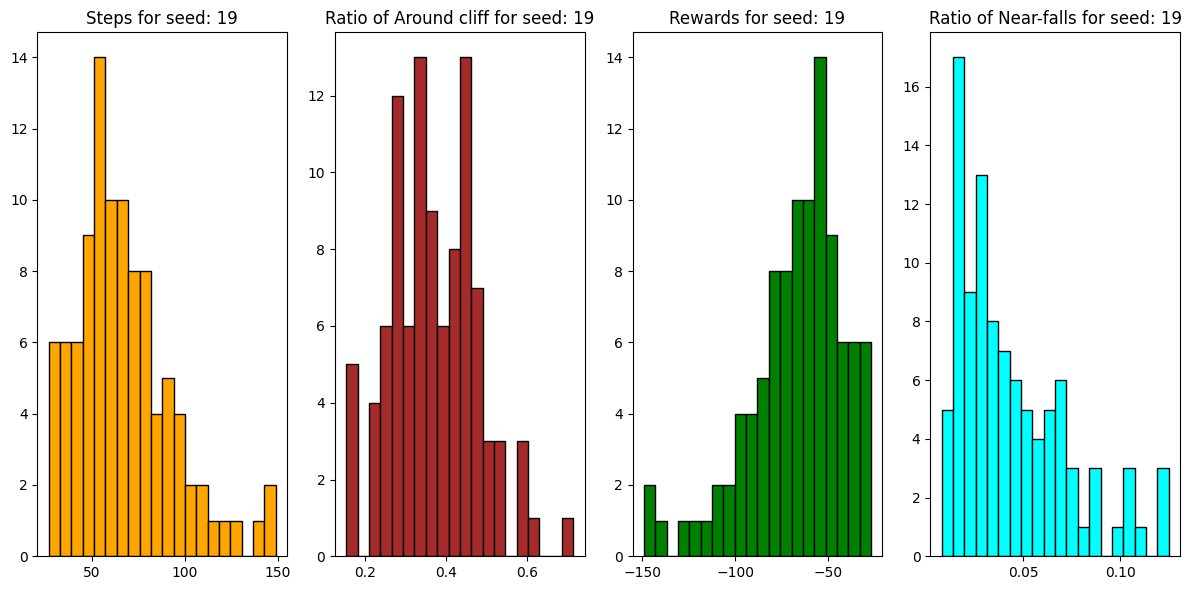

Initial Value Function V(s):
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0. ]]
Initial Policy:
[[1 3 1 2 1 2 1 0 1 2 2 3]
 [0 1 3 0 2 3 3 2 3 0 3 2]
 [2 3 3 0 3 3 1 2 3 0 1 0]
 [1 3 1 1 3 1 0 2 3 1 3 0]]
Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2174.34it/s]

 ==> Seed: 21, is converged in 8 iterations
Optimal Value Function V(s): 
 [[ -4.9986276   -4.99759733  -4.99553343  -4.99168916  -4.98457646
   -4.97152079  -4.94786475  -4.90594198  -4.83449674  -4.72121427
   -4.56594575  -4.41813147]
 [ -4.99872237  -4.99785846  -4.99602708  -4.99256813  -4.98606397
   -4.97381702  -4.95068577  -4.90684348  -4.8236516   -4.66739334
   -4.38821924  -3.98172998]
 [ -4.99893353  -4.99834448  -4.99699967  -4.99437709  -4.98934619
   -4.97960708  -4.96036327  -4.92106936  -4.83680333  -4.64329148
   -4.15814637  -2.81153818]
 [ -4.99939078 -37.99923361 -70.998875   -70.99817564 -70.99683407
  -70.99423697 -70.98910529 -70.97862691 -70.95615597 -70.90455281
  -36.44200991  -1.74974351]] 

Optimal Policy: 
 [[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]] 

 ==> Output for seed: 21
 ==> Average reward: -68.54
 ==> Average steps: 68.54
 ==> Average near fall: 0.04444377812547879
 ==> Average besid

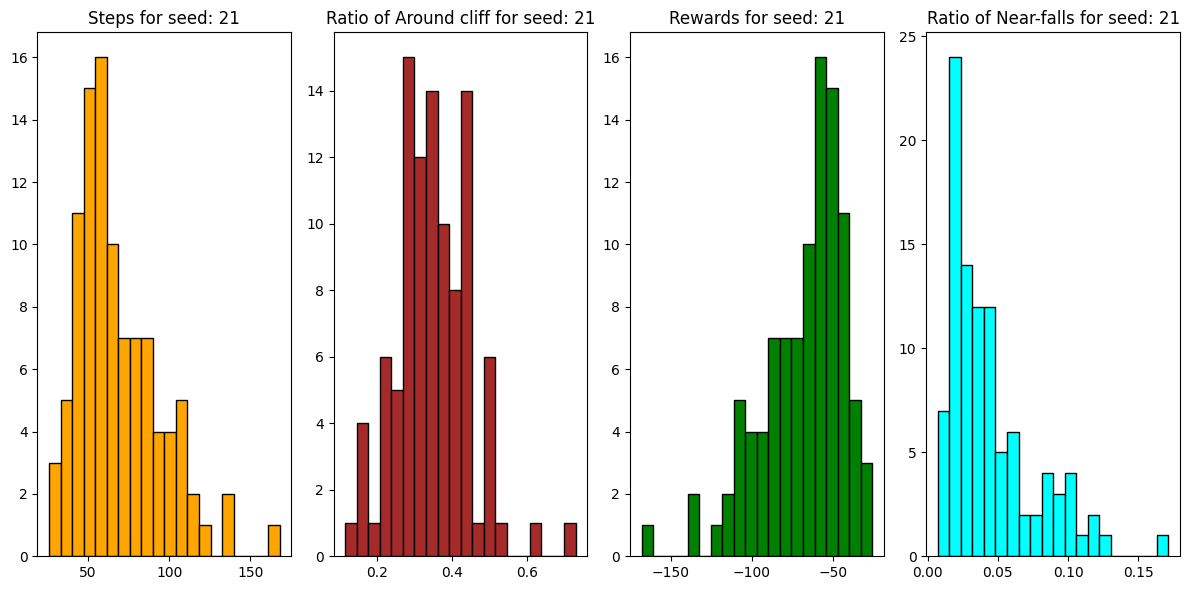

Initial Value Function V(s):
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0. ]]
Initial Policy:
[[0 2 1 2 1 0 2 0 0 2 2 3]
 [1 0 0 0 0 2 3 1 2 1 2 1]
 [1 0 0 1 0 1 0 1 0 2 1 2]
 [0 2 0 2 1 0 1 2 1 2 3 3]]
Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2609.75it/s]

 ==> Seed: 23, is converged in 7 iterations
Optimal Value Function V(s): 
 [[ -4.9986276   -4.99759733  -4.99553343  -4.99168916  -4.98457646
   -4.97152079  -4.94786475  -4.90594198  -4.83449674  -4.72121427
   -4.56594575  -4.41813147]
 [ -4.99872237  -4.99785846  -4.99602708  -4.99256813  -4.98606397
   -4.97381702  -4.95068577  -4.90684348  -4.8236516   -4.66739334
   -4.38821924  -3.98172998]
 [ -4.99893353  -4.99834448  -4.99699967  -4.99437709  -4.98934619
   -4.97960708  -4.96036327  -4.92106936  -4.83680332  -4.64329148
   -4.15814637  -2.81153818]
 [ -4.99939078 -37.99923361 -70.998875   -70.99817564 -70.99683407
  -70.99423697 -70.98910529 -70.97862691 -70.95615597 -70.90455281
  -36.44200991  -1.74974351]] 

Optimal Policy: 
 [[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]] 

 ==> Output for seed: 23
 ==> Average reward: -66.6
 ==> Average steps: 66.6
 ==> Average near fall: 0.045284838491584115
 ==> Average beside

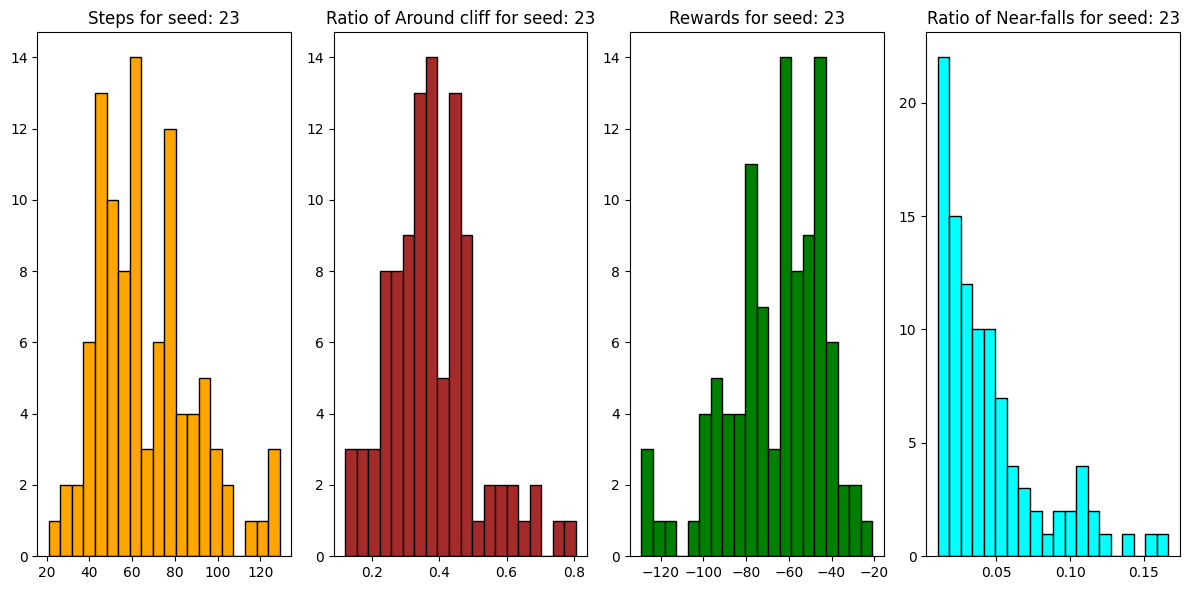

Initial Value Function V(s):
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0. ]]
Initial Policy:
[[2 0 3 0 0 0 2 1 0 0 2 0]
 [1 3 2 3 2 0 0 0 0 3 0 3]
 [1 1 0 3 1 0 2 2 1 2 2 3]
 [1 1 3 1 1 1 2 0 1 2 3 2]]
Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2783.27it/s]

 ==> Seed: 25, is converged in 8 iterations
Optimal Value Function V(s): 
 [[ -4.9986276   -4.99759733  -4.99553343  -4.99168916  -4.98457646
   -4.97152079  -4.94786475  -4.90594198  -4.83449674  -4.72121427
   -4.56594575  -4.41813147]
 [ -4.99872237  -4.99785846  -4.99602708  -4.99256813  -4.98606397
   -4.97381702  -4.95068577  -4.90684348  -4.8236516   -4.66739334
   -4.38821924  -3.98172998]
 [ -4.99893353  -4.99834448  -4.99699967  -4.99437709  -4.98934619
   -4.97960708  -4.96036327  -4.92106936  -4.83680333  -4.64329148
   -4.15814637  -2.81153818]
 [ -4.99939078 -37.99923361 -70.998875   -70.99817564 -70.99683407
  -70.99423697 -70.98910529 -70.97862691 -70.95615597 -70.90455281
  -36.44200991  -1.74974351]] 

Optimal Policy: 
 [[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]] 

 ==> Output for seed: 25
 ==> Average reward: -67.27
 ==> Average steps: 67.27
 ==> Average near fall: 0.04852925955657054
 ==> Average besid

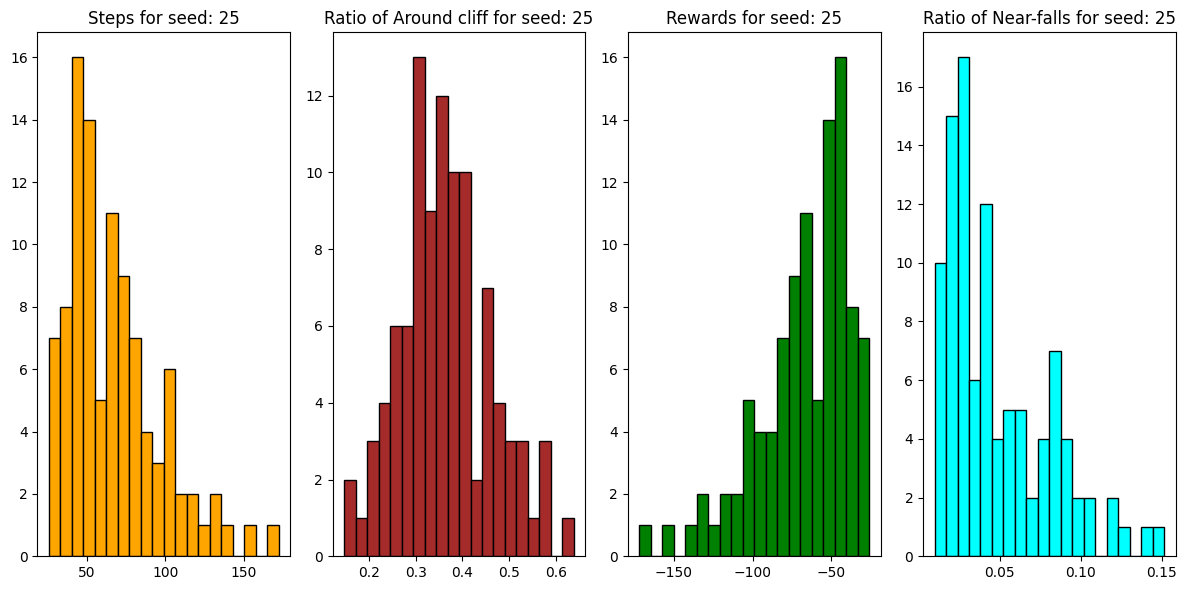

In [26]:
def policy_iteration(seed):
    env.reset()
    V, policy,seed = getInitalPolicy(seed)
    gamma = 0.8 # Discount factor
    theta = 1e-6 # Threshold for convergence
    iter = 0
    while True:
        V = policy_evaluation(env.unwrapped, V, policy, gamma, theta)
        policy, policy_stable = policy_improvement(env.unwrapped, V, policy, gamma)
        iter += 1
        if policy_stable:
            break
    return V, policy,seed,iter

for seed in [17, 19, 21, 23, 25]:
    optimal_V, optimal_policy,seed,iter = policy_iteration(seed)
    total_reward, total_steps, total_near_fall,total_beside_cliff = procedure(optimal_policy, n)
    print(f' ==> Seed: {seed}, is converged in {iter} iterations')
    print("Optimal Value Function V(s): \n", optimal_V.reshape(4, 12), "\n")
    print("Optimal Policy: \n", optimal_policy.reshape(4, 12), "\n")
    output(total_reward, total_steps, total_near_fall,total_beside_cliff,seed)
    

### Try with various V(s)



=== Testing seed 17 with different initial V(s) values ===

Initial setup for seed 17 with V(s)=0.1:
Initial Value Function V(s):
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0. ]]
Initial Policy:
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]
Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2608.85it/s]


Results for initial V(s)=0.1:
Converged in 17 iterations
Optimal Value Function V(s): 
 [[ -4.9986267   -4.99759669  -4.99553287  -4.99168868  -4.98457607
   -4.97152048  -4.94786452  -4.90594181  -4.83449661  -4.72121416
   -4.56594567  -4.4181314 ]
 [ -4.99872172  -4.99785799  -4.99602668  -4.99256779  -4.9860637
   -4.9738168   -4.9506856   -4.90684335  -4.8236515   -4.66739328
   -4.38821919  -3.98172995]
 [ -4.99893303  -4.99834411  -4.99699937  -4.99437684  -4.98934599
   -4.97960692  -4.96036314  -4.92106927  -4.83680325  -4.64329143
   -4.15814634  -2.81153816]
 [ -4.99939032 -37.99923326 -70.99887467 -70.99817533 -70.99683377
  -70.99423668 -70.98910501 -70.97862664 -70.9561557  -70.90455255
  -36.44200978  -1.74974351]] 

Optimal Policy: 
 [[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]] 

 ==> Output for seed: 17
 ==> Average reward: -63.94
 ==> Average steps: 63.94
 ==> Average near fall: 0.04681296298984998
 ==> 

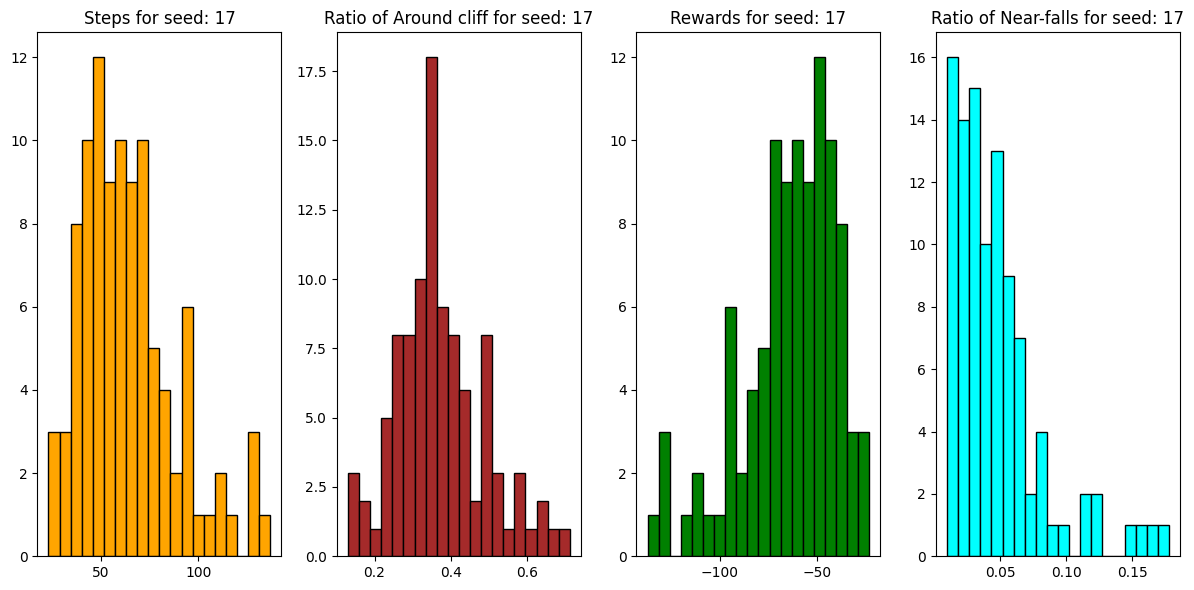


Initial setup for seed 17 with V(s)=0.5:
Initial Value Function V(s):
[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0. ]]
Initial Policy:
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]
Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2551.99it/s]


Results for initial V(s)=0.5:
Converged in 17 iterations
Optimal Value Function V(s): 
 [[ -4.9986267   -4.99759669  -4.99553287  -4.99168868  -4.98457607
   -4.97152048  -4.94786452  -4.90594181  -4.83449661  -4.72121416
   -4.56594567  -4.4181314 ]
 [ -4.99872172  -4.99785799  -4.99602668  -4.99256779  -4.9860637
   -4.9738168   -4.9506856   -4.90684335  -4.8236515   -4.66739328
   -4.38821919  -3.98172995]
 [ -4.99893303  -4.99834411  -4.99699937  -4.99437684  -4.98934599
   -4.97960692  -4.96036314  -4.92106927  -4.83680325  -4.64329143
   -4.15814634  -2.81153816]
 [ -4.99939032 -37.99923326 -70.99887467 -70.99817533 -70.99683377
  -70.99423668 -70.98910501 -70.97862664 -70.9561557  -70.90455255
  -36.44200978  -1.74974351]] 

Optimal Policy: 
 [[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]] 

 ==> Output for seed: 17
 ==> Average reward: -68.64
 ==> Average steps: 68.64
 ==> Average near fall: 0.04595408376246253
 ==> 

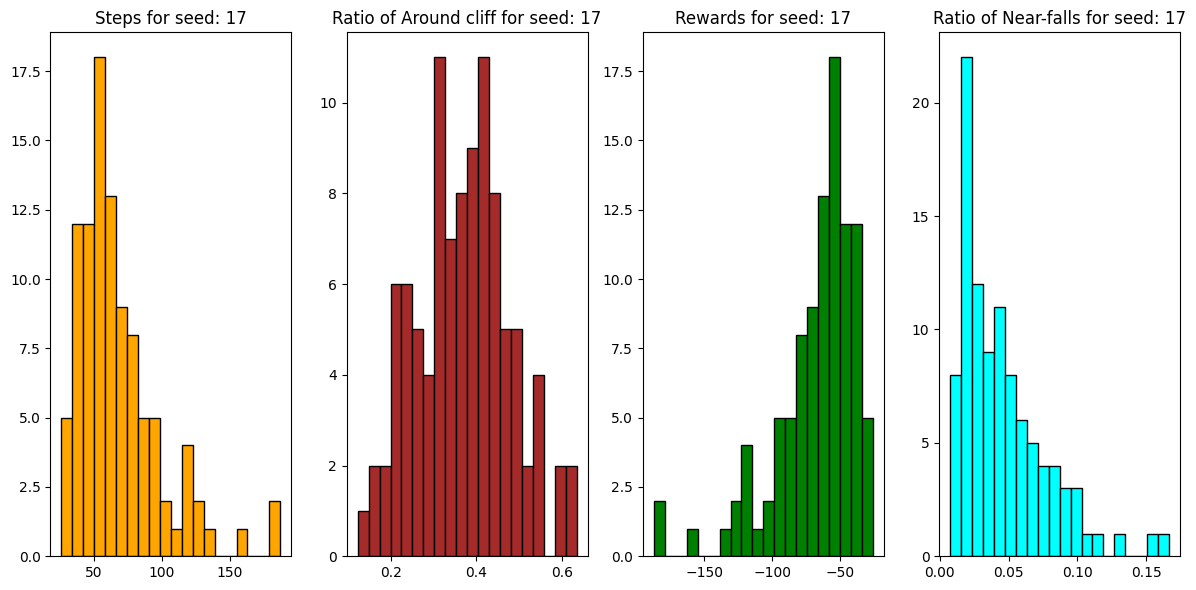


Initial setup for seed 17 with V(s)=1.0:
Initial Value Function V(s):
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]
Initial Policy:
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]
Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2656.32it/s]


Results for initial V(s)=1.0:
Converged in 17 iterations
Optimal Value Function V(s): 
 [[ -4.9986267   -4.99759669  -4.99553287  -4.99168868  -4.98457607
   -4.97152048  -4.94786452  -4.90594181  -4.83449661  -4.72121416
   -4.56594567  -4.4181314 ]
 [ -4.99872172  -4.99785799  -4.99602668  -4.99256779  -4.9860637
   -4.9738168   -4.9506856   -4.90684335  -4.8236515   -4.66739328
   -4.38821919  -3.98172995]
 [ -4.99893303  -4.99834411  -4.99699937  -4.99437684  -4.98934599
   -4.97960692  -4.96036314  -4.92106927  -4.83680325  -4.64329143
   -4.15814634  -2.81153816]
 [ -4.99939032 -37.99923326 -70.99887467 -70.99817533 -70.99683377
  -70.99423668 -70.98910501 -70.97862664 -70.9561557  -70.90455255
  -36.44200978  -1.74974351]] 

Optimal Policy: 
 [[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]] 

 ==> Output for seed: 17
 ==> Average reward: -61.45
 ==> Average steps: 61.45
 ==> Average near fall: 0.047094506516299706
 ==>

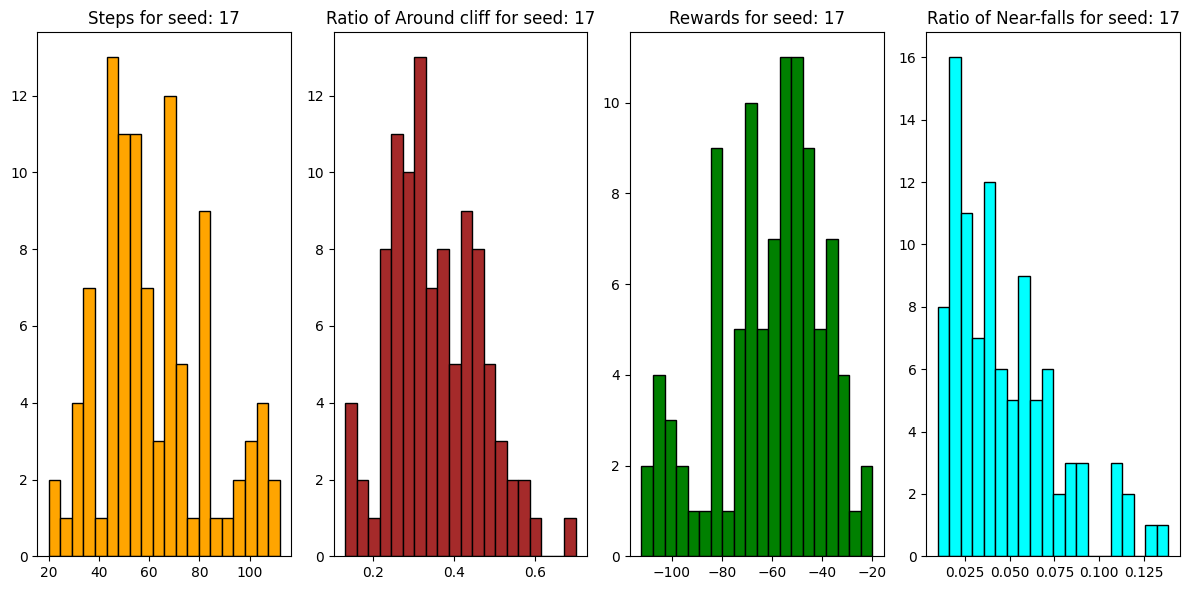

In [29]:
def policy_iteration_with_init_v(seed, init_v_value):
    env.reset()
    # Initialize V with the specified value except for terminal state
    V = np.array([init_v_value if i != 47 else 0 for i in range(48)])
    policy = generate_random_policy(nA, nS, seed)
    
    print(f"\nInitial setup for seed {seed} with V(s)={init_v_value}:")
    print("Initial Value Function V(s):")
    print(V.reshape(4, 12))
    print('Initial Policy:')
    print(policy.reshape(4, 12))
    
    gamma = 0.8
    theta = 1e-6
    iter = 0
    
    while True:
        V = policy_evaluation(env.unwrapped, V, policy, gamma, theta)
        policy, policy_stable = policy_improvement(env.unwrapped, V, policy, gamma)
        iter += 1
        if policy_stable:
            break
            
    return V, policy, iter

# Test different initial V(s) values
init_values = [0.1, 0.5, 1.0]
seeds = [17]

for seed in seeds:
    print(f"\n=== Testing seed {seed} with different initial V(s) values ===")
    for init_v in init_values:
        optimal_V, optimal_policy, iter = policy_iteration_with_init_v(seed, init_v)
        total_reward, total_steps, total_near_fall, total_beside_cliff = procedure(optimal_policy, n)
        print(f'\nResults for initial V(s)={init_v}:')
        print(f'Converged in {iter} iterations')
        print("Optimal Value Function V(s): \n", optimal_V.reshape(4, 12), "\n")
        print("Optimal Policy: \n", optimal_policy.reshape(4, 12), "\n")
        output(total_reward, total_steps, total_near_fall, total_beside_cliff, seed)

### Test different theta values


Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2313.31it/s]


Results for θ=0.01:
Converged in 7 iterations
Final Value Function V(s):
[[ -4.99974879  -4.99917669  -4.99785683  -4.99495761  -4.98897385
   -4.97739295  -4.95562237  -4.91497136  -4.84303408  -4.72872373
   -4.57427215  -4.42704259]
 [ -4.99972277  -4.99914467  -4.99786979  -4.99511843  -4.98950763
   -4.97846512  -4.95659452  -4.91323948  -4.82962714  -4.67339795
   -4.39450166  -3.98706661]
 [ -4.99972886  -4.99931131  -4.99832532  -4.99619625  -4.99182603
   -4.9829403   -4.9644863   -4.92548895  -4.84105703  -4.64758973
   -4.16212985  -2.81412324]
 [ -4.99991333 -37.99977012 -70.99950719 -70.99893944 -70.99777405
  -70.99540452 -70.99048346 -70.98008416 -70.95756898 -70.9059777
  -36.44321151  -1.75043286]]

Final Policy:
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 3 0 0 0 0 0 0 0 0 1]]
 ==> Output for seed: 17
 ==> Average reward: -65.92
 ==> Average steps: 65.92
 ==> Average near fall: 0.03927888569702545
 ==> Average beside cliff: 

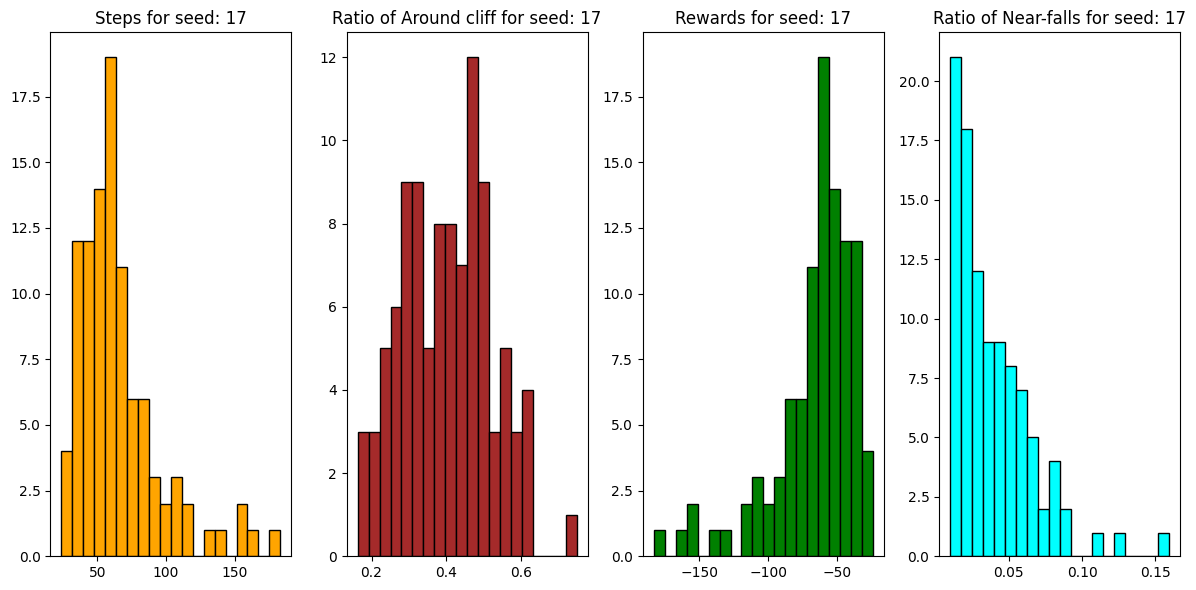

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2602.14it/s]


Results for θ=0.0001:
Converged in 7 iterations
Final Value Function V(s):
[[ -4.99864224  -4.99762088  -4.99557299  -4.99174982  -4.98465864
   -4.97161808  -4.94796583  -4.90603573  -4.83457653  -4.72127894
   -4.56599818  -4.41817685]
 [ -4.9987356   -4.99787862  -4.99605947  -4.99261549  -4.98612526
   -4.97388679  -4.95075613  -4.90690731  -4.8237047   -4.66743455
   -4.38824919  -3.98174971]
 [ -4.99894439  -4.99835968  -4.99702288  -4.99441025  -4.98938865
   -4.97965541  -4.96041244  -4.92111456  -4.83684123  -4.64332047
   -4.15816575  -2.81154709]
 [ -4.99939749 -37.99924124 -70.99888476 -70.99818806 -70.99684897
  -70.99425344 -70.98912198 -70.97864254 -70.95616966 -70.90456412
  -36.44201686  -1.74974589]]

Final Policy:
[[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]]
 ==> Output for seed: 17
 ==> Average reward: -68.81
 ==> Average steps: 68.81
 ==> Average near fall: 0.048958052577079025
 ==> Average beside cli

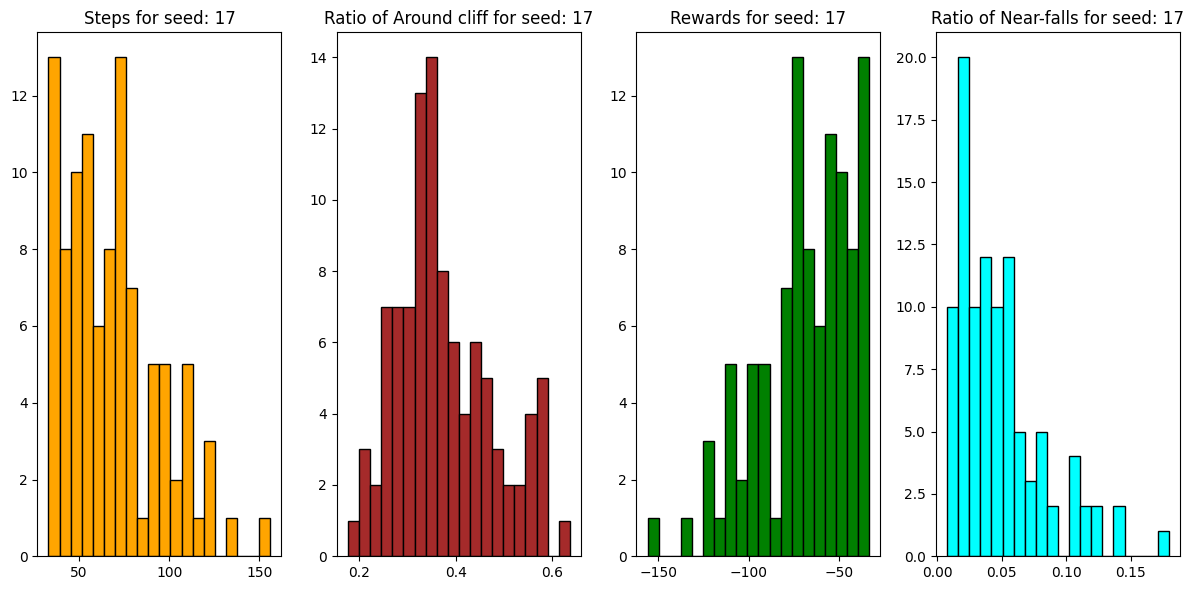

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2609.68it/s]


Results for θ=1e-06:
Converged in 17 iterations
Final Value Function V(s):
[[ -4.9986267   -4.99759669  -4.99553287  -4.99168868  -4.98457607
   -4.97152048  -4.94786452  -4.90594181  -4.83449661  -4.72121416
   -4.56594567  -4.4181314 ]
 [ -4.99872172  -4.99785799  -4.99602668  -4.99256779  -4.9860637
   -4.9738168   -4.9506856   -4.90684335  -4.8236515   -4.66739328
   -4.38821919  -3.98172995]
 [ -4.99893303  -4.99834411  -4.99699937  -4.99437684  -4.98934599
   -4.97960692  -4.96036314  -4.92106927  -4.83680325  -4.64329143
   -4.15814634  -2.81153816]
 [ -4.99939032 -37.99923326 -70.99887467 -70.99817533 -70.99683377
  -70.99423668 -70.98910501 -70.97862664 -70.9561557  -70.90455255
  -36.44200978  -1.74974351]]

Final Policy:
[[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]]
 ==> Output for seed: 17
 ==> Average reward: -65.53
 ==> Average steps: 65.53
 ==> Average near fall: 0.04547643340822742
 ==> Average beside cliff

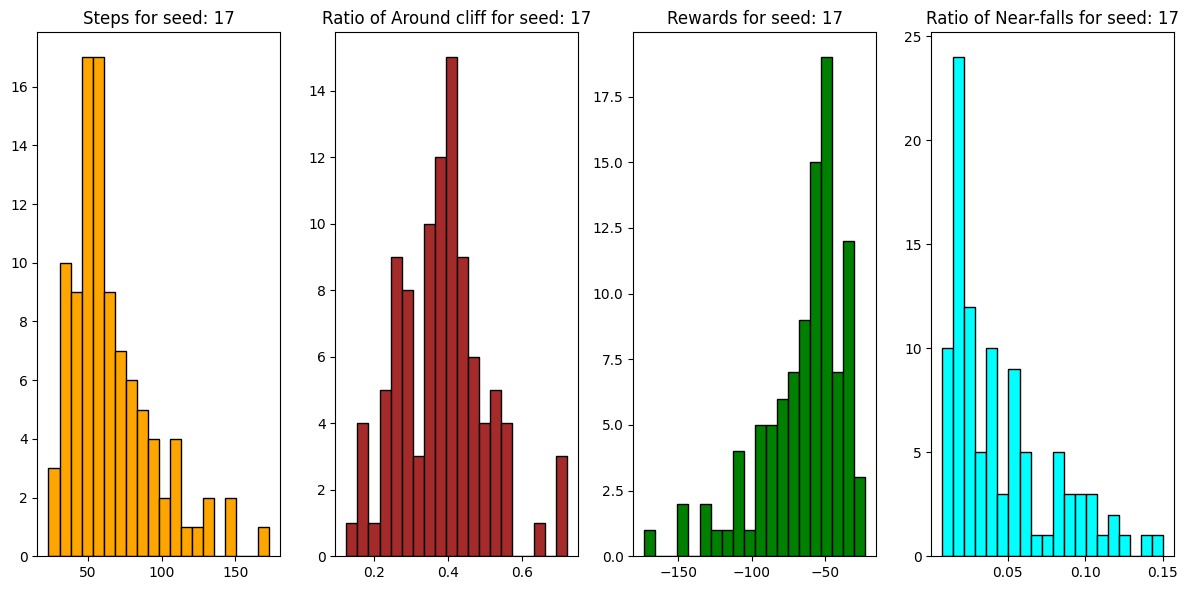

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2858.67it/s]


Results for θ=1e-08:
Converged in 27 iterations
Final Value Function V(s):
[[ -4.99862667  -4.99759667  -4.99553285  -4.99168867  -4.98457606
   -4.97152048  -4.94786451  -4.9059418   -4.8344966   -4.72121416
   -4.56594567  -4.4181314 ]
 [ -4.99872169  -4.99785798  -4.99602666  -4.99256779  -4.98606369
   -4.9738168   -4.9506856   -4.90684335  -4.8236515   -4.66739327
   -4.38821919  -3.98172995]
 [ -4.99893301  -4.99834409  -4.99699936  -4.99437683  -4.98934598
   -4.97960691  -4.96036314  -4.92106927  -4.83680325  -4.64329143
   -4.15814634  -2.81153816]
 [ -4.99939029 -37.99923325 -70.99887465 -70.99817531 -70.99683375
  -70.99423667 -70.98910499 -70.97862663 -70.95615569 -70.90455254
  -36.44200977  -1.74974351]]

Final Policy:
[[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]]
 ==> Output for seed: 17
 ==> Average reward: -66.11
 ==> Average steps: 66.11
 ==> Average near fall: 0.05132612617895859
 ==> Average beside clif

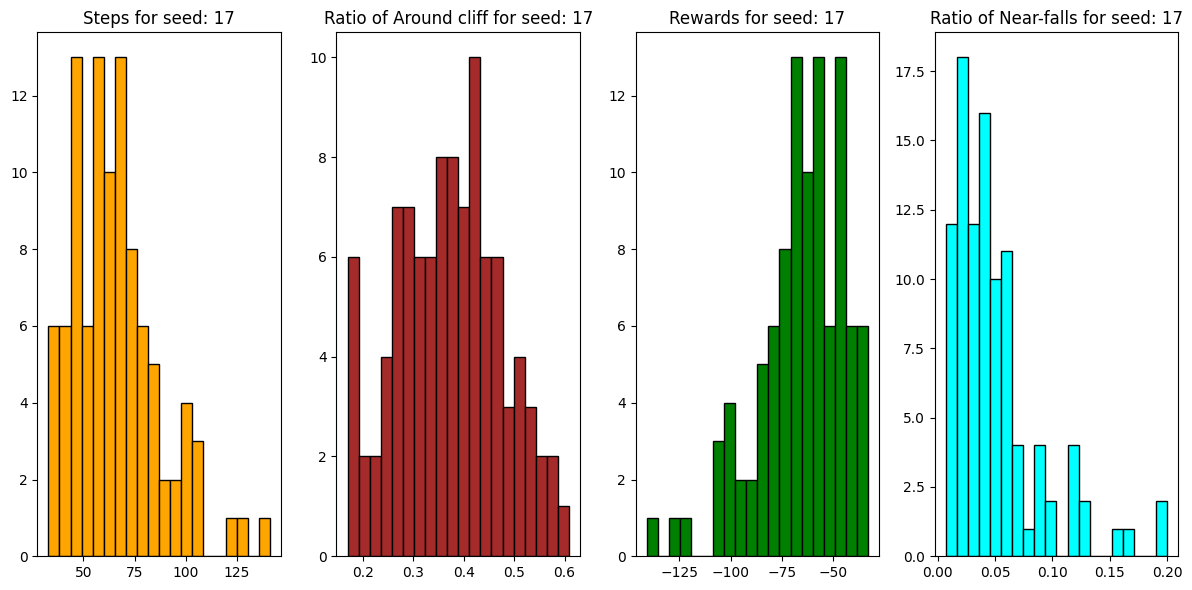


Comparison Summary:
θ		Iterations	Avg Reward	Avg Steps
--------------------------------------------------
1e-02	7		-65.92		65.92
1e-04	7		-68.81		68.81
1e-06	17		-65.53		65.53
1e-08	27		-66.11		66.11


In [30]:
# Test different theta values
theta_values = [1e-2, 1e-4, 1e-6, 1e-8]
seed = 17  # Use a fixed seed for comparison

results = []
for theta in theta_values:
    env.reset()
    V = np.array([0.1 if i != 47 else 0 for i in range(48)])
    policy = generate_random_policy(nA, nS, seed)
    gamma = 0.8
    
    # Modified policy iteration with different theta
    iter = 0
    while True:
        V = policy_evaluation(env.unwrapped, V, policy, gamma, theta)
        policy, policy_stable = policy_improvement(env.unwrapped, V, policy, gamma)
        iter += 1
        if policy_stable:
            break
            
    # Run the policy to evaluate performance
    total_reward, total_steps, total_near_fall, total_beside_cliff = procedure(policy, n)
    
    print(f"\nResults for θ={theta}:")
    print(f'Converged in {iter} iterations')
    print("Final Value Function V(s):")
    print(V.reshape(4, 12))
    print("\nFinal Policy:")
    print(policy.reshape(4, 12))
    
    output(total_reward, total_steps, total_near_fall, total_beside_cliff, seed)
    
    # Store results for comparison
    results.append({
        'theta': theta,
        'iterations': iter,
        'avg_reward': np.mean(total_reward),
        'avg_steps': np.mean(total_steps)
    })

# Print comparison summary
print("\nComparison Summary:")
print("θ\t\tIterations\tAvg Reward\tAvg Steps")
print("-" * 50)
for r in results:
    print(f"{r['theta']:.0e}\t{r['iterations']}\t\t{r['avg_reward']:.2f}\t\t{r['avg_steps']:.2f}")

### Try different gamma


Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2838.25it/s]


Results for γ=0.1:
Converged in 8 iterations
Final Value Function V(s):
[[ -1.11111111  -1.11111111  -1.11111111  -1.11111111  -1.11111111
   -1.11111111  -1.11111111  -1.11111111  -1.11111109  -1.1111108
   -1.11110647  -1.11106376]
 [ -1.11111111  -1.11111111  -1.11111111  -1.11111111  -1.11111111
   -1.11111111  -1.11111111  -1.1111111   -1.11111092  -1.11110677
   -1.111024    -1.10978535]
 [ -1.11111111  -1.11111111  -1.11111111  -1.11111111  -1.11111111
   -1.11111111  -1.11111111  -1.11111106  -1.11110967  -1.11106815
   -1.10982811  -1.07275122]
 [ -1.11111111 -34.11111111 -67.11111111 -67.11111111 -67.11111111
  -67.11111111 -67.11111111 -67.11111111 -67.11111106 -67.11110968
  -34.07403131  -1.03575837]]

Final Policy:
[[0 0 0 1 1 1 1 1 1 1 1 1]
 [0 0 2 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 3 0 0 0 0 0 0 0 1 1]]
 ==> Output for seed: 17
 ==> Average reward: -72.75
 ==> Average steps: 72.75
 ==> Average near fall: 0.043727942603400585
 ==> Average beside cliff: 

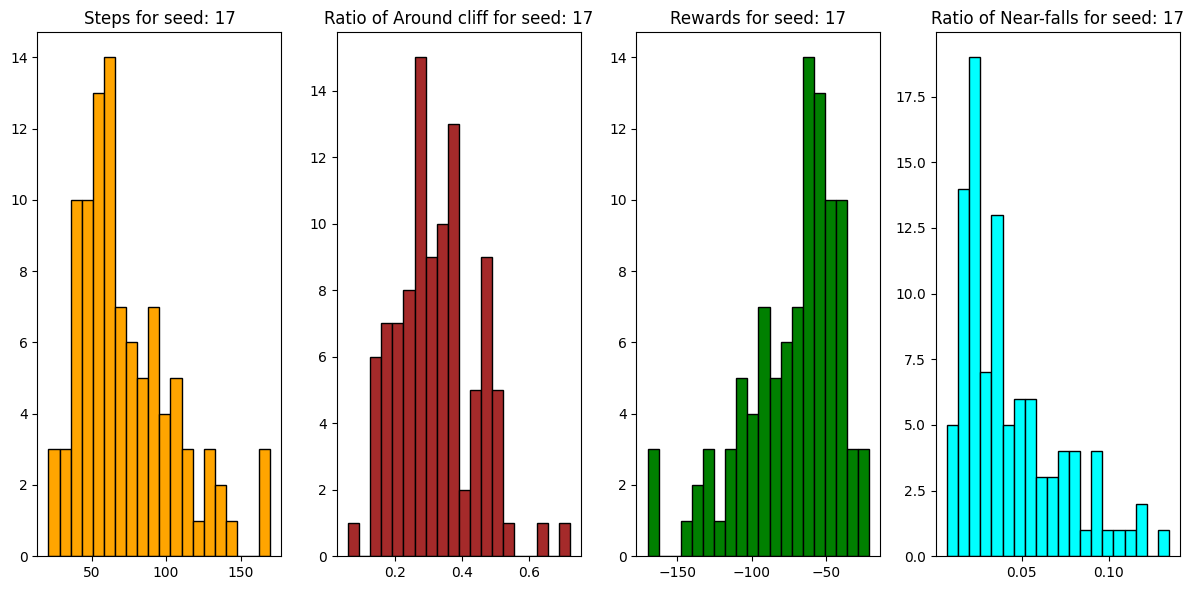

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2932.38it/s]


Results for γ=0.5:
Converged in 24 iterations
Final Value Function V(s):
[[ -1.99999998  -1.99999991  -1.99999963  -1.99999852  -1.99999412
   -1.99997704  -1.99991242  -1.99967708  -1.99886794  -1.99633367
   -1.98963153  -1.97763157]
 [ -1.99999998  -1.99999991  -1.99999964  -1.99999848  -1.99999356
   -1.99997277  -1.99988501  -1.99951744  -1.99800604  -1.99203682
   -1.97052609  -1.91052627]
 [ -1.99999998  -1.99999994  -1.99999973  -1.99999878  -1.99999449
   -1.99997457  -1.99988018  -1.99942151  -1.99713145  -1.98536117
   -1.92299875  -1.58210525]
 [ -2.         -34.99999999 -67.99999995 -67.9999998  -67.99999908
  -67.99999576 -67.99998003 -67.99990358 -67.99952191 -67.99756019
  -34.65383312  -1.26368421]]

Final Policy:
[[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 3 3 0 0 0 0 0 0 0 1 1]]
 ==> Output for seed: 17
 ==> Average reward: -66.42
 ==> Average steps: 66.42
 ==> Average near fall: 0.050750757961032476
 ==> Average beside cliff

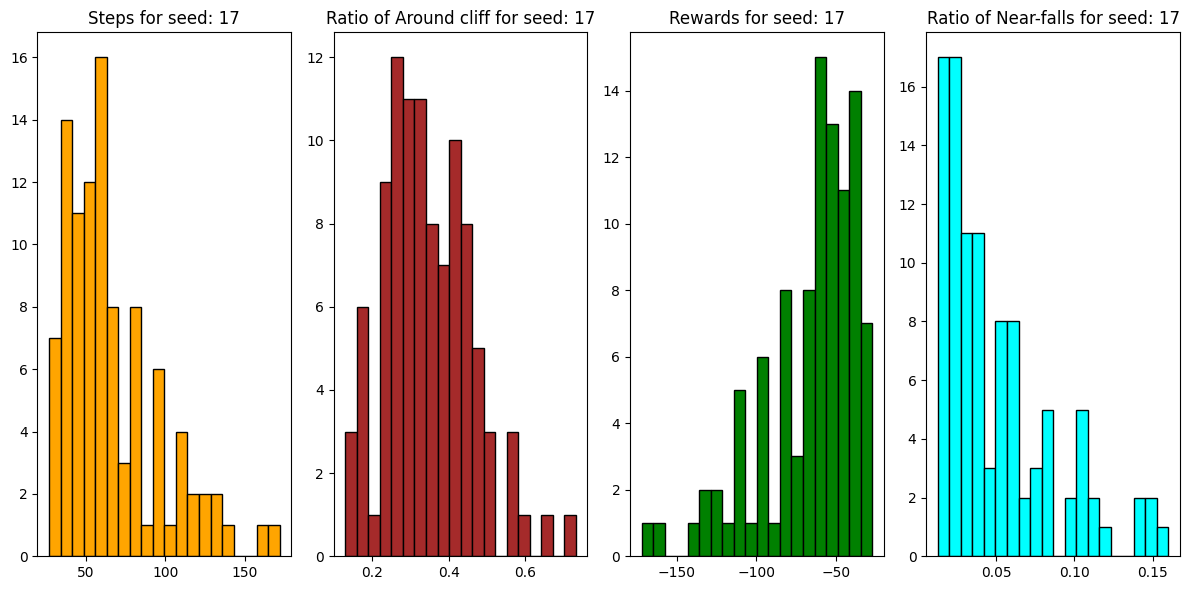

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2580.03it/s]


Results for γ=0.8:
Converged in 17 iterations
Final Value Function V(s):
[[ -4.9986267   -4.99759669  -4.99553287  -4.99168868  -4.98457607
   -4.97152048  -4.94786452  -4.90594181  -4.83449661  -4.72121416
   -4.56594567  -4.4181314 ]
 [ -4.99872172  -4.99785799  -4.99602668  -4.99256779  -4.9860637
   -4.9738168   -4.9506856   -4.90684335  -4.8236515   -4.66739328
   -4.38821919  -3.98172995]
 [ -4.99893303  -4.99834411  -4.99699937  -4.99437684  -4.98934599
   -4.97960692  -4.96036314  -4.92106927  -4.83680325  -4.64329143
   -4.15814634  -2.81153816]
 [ -4.99939032 -37.99923326 -70.99887467 -70.99817533 -70.99683377
  -70.99423668 -70.98910501 -70.97862664 -70.9561557  -70.90455255
  -36.44200978  -1.74974351]]

Final Policy:
[[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]]
 ==> Output for seed: 17
 ==> Average reward: -66.38
 ==> Average steps: 66.38
 ==> Average near fall: 0.04400681769422257
 ==> Average beside cliff: 

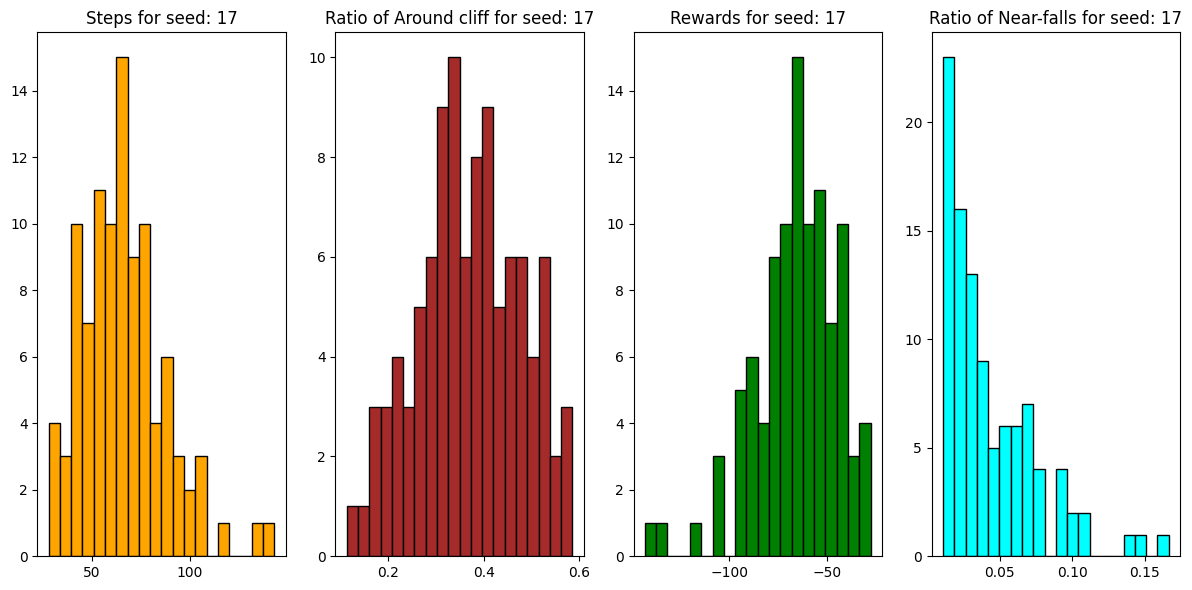

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 2787.08it/s]


Results for γ=0.9:
Converged in 11 iterations
Final Value Function V(s):
[[ -9.90225461  -9.86967242  -9.81685059  -9.74139885  -9.63470991
   -9.48483183  -9.27613692  -8.99013931  -8.61004928  -8.13507602
   -7.61569565  -7.21649485]
 [ -9.90627415  -9.87905154  -9.83125243  -9.76188734  -9.6628246
   -9.52180399  -9.32084683  -9.0336091   -8.62170563  -8.03281507
   -7.22012833  -6.2886598 ]
 [ -9.91522336  -9.89591351  -9.85877008  -9.80206765  -9.71956807
   -9.60033464  -9.42641006  -9.16685207  -8.76282107  -8.08751254
   -6.82940567  -4.12371134]
 [ -9.9364178  -42.93062473 -75.9194817  -75.90247098 -75.8777211
  -75.84195107 -75.7897737  -75.7119063  -75.590697   -75.38810444
  -39.02974704  -2.2371134 ]]

Final Policy:
[[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 1 1]]
 ==> Output for seed: 17
 ==> Average reward: -65.96
 ==> Average steps: 65.96
 ==> Average near fall: 0.042792288574813646
 ==> Average beside cliff: 

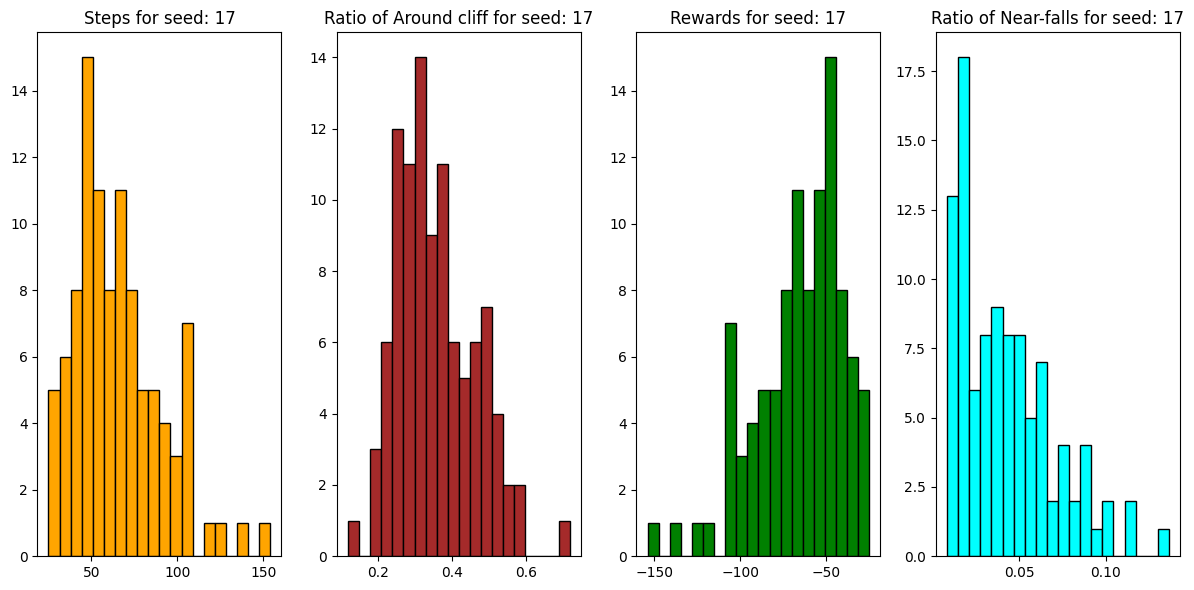

Running the policy for 100 episodes...


100%|██████████| 100/100 [00:00<00:00, 3302.52it/s]


Results for γ=0.99:
Converged in 4 iterations
Final Value Function V(s):
[[ -43.84044516  -42.13863835  -39.83181964  -37.30538546  -34.61170433
   -31.77867821  -28.82754649  -25.78912346  -22.72795229  -19.78715325
   -17.26742435  -15.71405118]
 [ -44.11303591  -42.69208103  -40.53497464  -38.09922915  -35.46326655
   -32.66249691  -29.70922836  -26.60148012  -23.32717409  -19.87618982
   -16.31374977  -13.15993151]
 [ -44.72700106  -43.66602555  -41.871904    -39.65325405  -37.15993952
   -34.45905359  -31.56863496  -28.46394518  -25.05396118  -21.09967216
   -15.97794646   -7.97429463]
 [ -46.35267936  -79.00255681 -111.4104967  -110.67834221 -109.85554842
  -108.96425606 -108.01041792 -106.98587029 -105.86057557 -104.55566019
   -54.56910652   -3.63151723]]

Final Policy:
[[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 1 1]]
 ==> Output for seed: 17
 ==> Average reward: -65.41
 ==> Average steps: 65.41
 ==> Average near fall

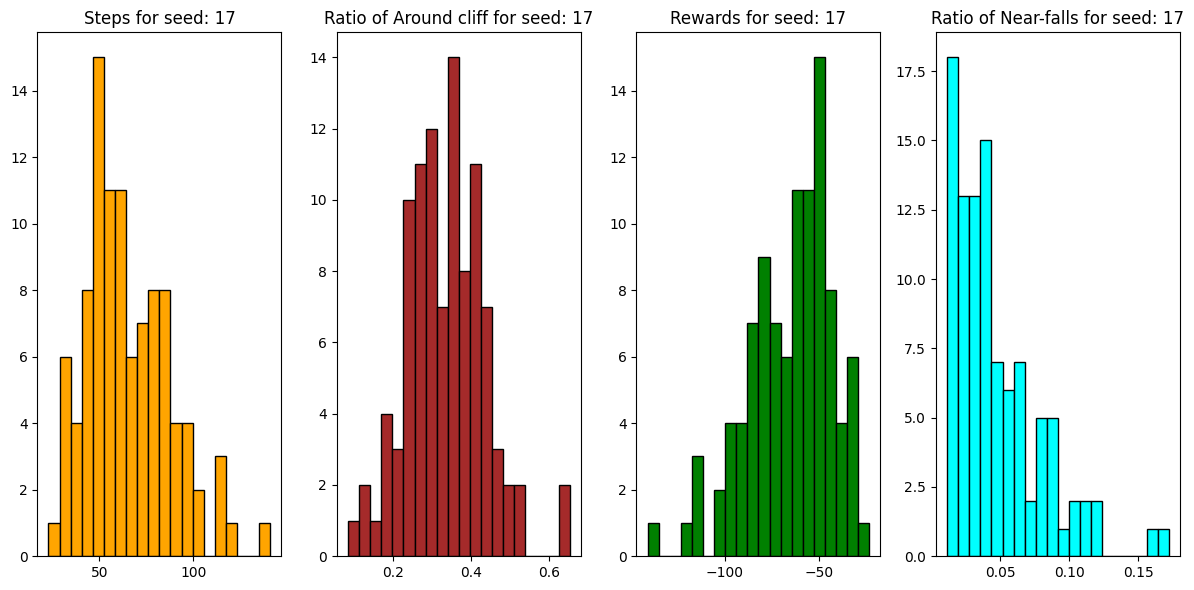


Comparison Summary:
γ	Iterations	Avg Reward	Avg Steps	Avg Near Fall	Avg Beside Cliff
--------------------------------------------------------------------------------
0.10	8		-72.75		72.75		0.044		0.323
0.50	24		-66.42		66.42		0.051		0.345
0.80	17		-66.38		66.38		0.044		0.369
0.90	11		-65.96		65.96		0.043		0.357
0.99	4		-65.41		65.41		0.048		0.335


In [31]:
# Test different gamma values
gamma_values = [0.1, 0.5, 0.8, 0.9, 0.99]
seed = 17  # Use a fixed seed for comparison

results = []
for gamma in gamma_values:
    env.reset()
    V = np.array([0.1 if i != 47 else 0 for i in range(48)])
    policy = generate_random_policy(nA, nS, seed)
    theta = 1e-6  # Fixed theta value
    
    # Policy iteration with different gamma
    iter = 0
    while True:
        V = policy_evaluation(env.unwrapped, V, policy, gamma, theta)
        policy, policy_stable = policy_improvement(env.unwrapped, V, policy, gamma)
        iter += 1
        if policy_stable:
            break
            
    # Run the policy to evaluate performance
    total_reward, total_steps, total_near_fall, total_beside_cliff = procedure(policy, n)
    
    print(f"\nResults for γ={gamma}:")
    print(f'Converged in {iter} iterations')
    print("Final Value Function V(s):")
    print(V.reshape(4, 12))
    print("\nFinal Policy:")
    print(policy.reshape(4, 12))
    
    output(total_reward, total_steps, total_near_fall, total_beside_cliff, seed)
    
    # Store results for comparison
    results.append({
        'gamma': gamma,
        'iterations': iter,
        'avg_reward': np.mean(total_reward),
        'avg_steps': np.mean(total_steps),
        'avg_near_fall': np.mean(total_near_fall),
        'avg_beside_cliff': np.mean(total_beside_cliff)
    })

# Print comparison summary
print("\nComparison Summary:")
print("γ\tIterations\tAvg Reward\tAvg Steps\tAvg Near Fall\tAvg Beside Cliff")
print("-" * 80)
for r in results:
    print(f"{r['gamma']:.2f}\t{r['iterations']}\t\t{r['avg_reward']:.2f}\t\t{r['avg_steps']:.2f}\t\t{r['avg_near_fall']:.3f}\t\t{r['avg_beside_cliff']:.3f}")